# Derivate

### Rights & Credits
Questo notebook è stato realizzato da Agostino Migliore.

## 1 Introduzione
Il concetto di derivata gioca un ruolo fondamentale nella definizione di punti di estremo (min = minimo o max = massimo) e nella maggior parte dei metodi per la loro ricerca.In qesta lezione ci proponiamo di studiare alcuni metodi per la ricerca di <span style="color:blue">minimi</span> e <span style="color:blue">massimi</span> (in generale, <span style="color:blue">estremi</span>) di funzioni. Molti problemi importanti della chimica richiedono la ricerca di minimi e massimi, per esempio per

- trovare le condizioni che massimizzano la resa di una reazione,
- determinare l'energia di stato fondamentale di una molecola e la corrispondente funzione d'onda,
- fare il training di reti nurali per applicazioni in chimica,
- trovare il minimo della cosiddetta *loss function* in machine learning, ecc.

Qui consideriamo il concetto di derivata di una funzione di una o più variabili con attenzione alla sua discretizzazione necessaria per la realizzazione di programmi di computazione. Mostreremo quindi l'uso di funzioni di <span style="color:blue">SciPy</span> e di altri programmi per il calcolo di derivate di qualsiasi tipo e ordine. La lezione seguente presenterà invece l'analisi della ricerca di min e max per mezzo di derivate e la descrizione di metodi per tale ricerca.

## 2 Derivate analitiche e discrete

La definizione di derivata comporta un'operazione di limite sul rapporto incrementale:
$$
f'(x) \equiv \frac{df(x)}{dx} = \lim_{\Delta x\to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x} \tag{1}
$$
La sua rappresentazione geometrica è fornita nella figura sottostante.

<pass/> <div align="center"><div style="width: 280px">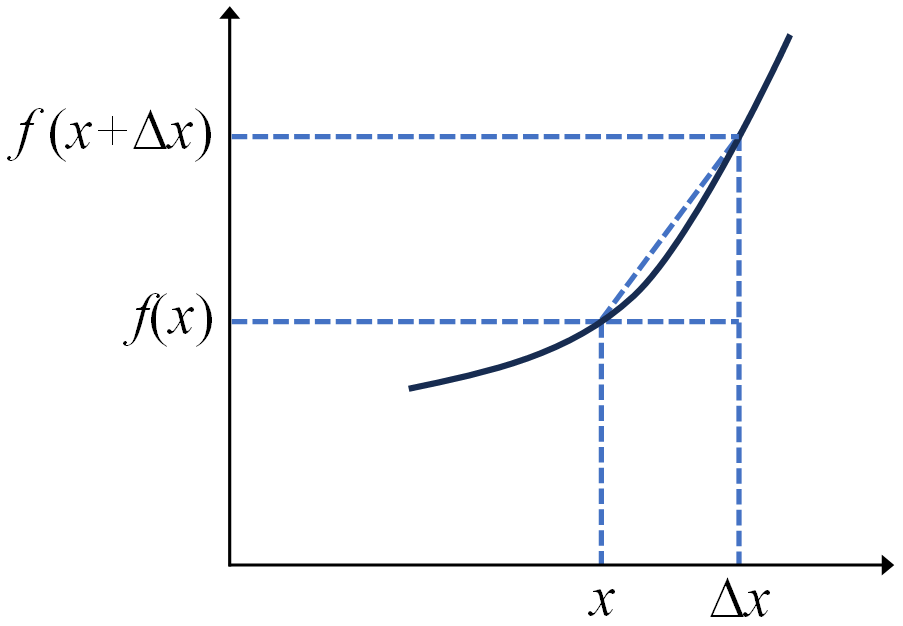</div></div>

Considerato che tutti i dati trattati da un computer sono discreti, possiamo usare la (1) per ottenere la derivata numericamente come il rapporto tra due valori di $f$ corrispondenti a due valori consecutivi di $x$ e la distanza $\Delta x$ tra questi ultimi. Usando la notazione $f_i \equiv f(x_i)$, scriviamo quindi
$$
f'_i \approx \frac{f_{i+1} - f_i}{\Delta x}
$$
Metodi più accurati si basano sull'espansione in serie di Taylor attorno a un punto $x$:
$$
f(x+\Delta x) = f(x) + {\Delta x}f'(x) + \frac{{\Delta x}^2}{2!} f''(x) + \frac{{\Delta x}^3}{3!} f^{(3)}(x) + ... \tag{2}
$$
Chiaramente, la (1) risulta dal considerare solo i primi due termini nel lato destro della (2). In termini discreti, la (2) diventa
$$
f_{i+1} = f_i + {\Delta x}f'_i + \frac{{\Delta x}^2}{2!}f''_i + \frac{{\Delta x}^3}{3!}f^{(3)}_i + ... \tag{3}
$$
L'espansione di Taylor ci consente allo stesso modo di approssimare $f_{i-1}$. In tal caso, usando una separazione costante tra i punti, cioè una griglia unidimensionale uniforme, la variazione della variabile indipendente è $\,x_{i-1} - x_i$ = $-(x_i - x_{i-1}) = -(x_{i+1} - x_i) = -\Delta x$;$\,$ quindi
$$
f_{i-1} = f_i - {\Delta x}f'_i + \frac{{\Delta x}^2}{2!}f''_i - \frac{{\Delta x}^3}{3!}f^{(3)}_i + ... \tag{4}
$$
Sottranedo membro a membro l'equazione (4) dall'equazione (3) si ottiene
$$
f_{i+1} - f_{i-1} = 2{\Delta x}f'_i + 2\frac{{\Delta x}^3}{6}f^{(3)} + ... \tag{5}
$$
e, dividendo per $2\Delta x$, otteniamo la seguente stima discreta della derivata, detta <span style="color:blue">derivata a tre punti</span>, stavolta trascurando i termini a cominciare dal terzo ordine in $\Delta x$:
$$
f'_i \approx \frac{f_{i+1} - f_{i-1}}{2\Delta x} \tag{6}
$$
Ovviamente, si può procedere ad ordini superiori. Per esempio, si ha
$$
f_{i\pm 2} = f_i \pm 2{\Delta x}f'_i + \frac{(2\Delta x)^2}{2!}f''_i \pm \frac{{(2\Delta x)^3}}{3!}f^{(3)}_i + ... \tag{7}
$$
da cui
$$
f_{i+2} - f_{i-2} = 4{\Delta x}f'_i + 2\frac{8{\Delta x}^3}{6}f^{(3)}_i + ... \tag{8}
$$
Sottranedo membro a membro l'equazione (5) moltiplicata per 8 dall'equazione (8), si ottiene la cosiddetta <span style="color:blue">derivata a cinque punti</span>
$$
f'_i \approx \frac{1}{12\Delta x}\left(f_{i-2} - 8f_{i-1} + 8f_{i+1} - f_{i+2}\right) \tag{9}
$$
che trascura termini dell'ordine di ${\Delta x}^5$. Potremmo continuare a raffinare l'espressione per la derivata discreta, migliorando l'accuratezza al costo di una crescente complessità. Inoltre, le formule che utilizzano più punti non possono essere usate vicino ai punti limite del dominio della funzione (quanto vicino dipende, ovviamente, da quanti punti sono usati nell'espressione della derivata).

Quanto alla derivata seconda, derivando ulteriormente la (1) in modo simmetrico rispetto al punto centrale si ottiene
$$
\begin{align}
 f''(x) \equiv \frac{d^2 f(x)}{{dx}^2} &= \lim_{\Delta x\to 0} \frac{\frac{f(x+\Delta x)-f(x)}{\Delta x}-\frac{f(x)-f(x-\Delta x)}{\Delta x}}{\Delta x} \notag \\[4pt]
 &= \lim_{\Delta x\to 0} \frac{f(x+\Delta x)-2f(x)+f(x-\Delta x)}{{\Delta x}^2} \notag
\end{align} \tag{10}
$$
Discretizzando direattamente la (10), oppure sommando la (3) e la (4) e riarrangiando, si ottiene
$$
 f''_i \approx \frac{f_{i+1}-2f_i+f_{i-1}}{{\Delta x}^2} \tag{11}
$$
che rappresenta la formula per la <span style="color:blue">derivata seconda a tre punti</span> ed è corretta fino al terzo ordine in $\Delta x$, visto che i termini di tale ordine si annullano nella somma delle equazioni (3) e (4). Si può dimostrare che la <span style="color:blue">derivata seconda a cinque punti</span> è data da
$$
 f''_i \approx \frac{-f_{i+2}+16f_{i+1}-30f_i+16f_{i-1}-f_{i-2}}{{12\Delta x}^2} \tag{12}
$$
e anche nel caso della derivata seconda si può procedere con derivate che utilizzano più punti.

La derivata seconda nella forma (11) è molto usata nelle simulazioni di <span style="color:magenta">Dinamica Molecolare</span> classica (in inglese, *molecular dynamics*, abbreviata con <span style="color:magenta">MD</span>) e in sue forme ibride con sottosistemi quantistici. In tale contesto, $x$ rappresenta una componente del vettore posizione di un atomo e la derivata seconda fornisce quindi la corrispondente componente dell'accelerazione dell'atomo. Nelle simulazioni di MD gli atomi vengono trattati come sistemi classici soggetti all'equazione del moto di Newton
$$
 \textbf{a}_n = \frac{\textbf{F}_n}{m_n} = -\frac{1}{m_n} {\nabla}_n V \tag{13}
$$
con
$$
 {\nabla}_n V = \frac{\partial{V}}{\partial{x_n}}\hat{\textbf{x}} + \frac{\partial{V}}{\partial{y_n}}\hat{\textbf{y}} + 
 \frac{\partial{V}}{\partial{z_n}}\hat{\textbf{z}} \tag{14}
$$
essendo $\, \textbf{r}_n = (x_n, y_n, z_n)\, $ il vettore posizione dell'atomo $n$ (di una molecola per esempio, come nella figura di sotto), $\textbf{F}_n$ la forza totale agente su di esso, ottenuta come l'opposto del gradiente del potenziale d'interazione $V$ (che contiene vari termini, come schematizzato nella figura in basso a sinitra) rispetto alle coordinate dell'atomo.
Una volta descritto $V$ nel miglior modo possibile, il fine della MD è di determinare la dinamica di un dato sistema molecolare a partire da una certa configurazione iniziale. La dinamica è ovviamente descritta su una scala di tempi discreta; cioè, le quantità che descrivono il moto del sistema vengono aggiornate a istanti di tempo separati da un certo intervallo di tempo $\Delta t$, chiamato il *timestep* (o *time step*) della data simulazione. In particolare, al tempo $t_i$ si calcolano le posizioni degli atomi, le loro velocità e le forze che agiscono su di essi, quindi le loro accelerazioni, da cui si ricavano le quantità dinamiche al tempo $t_{i+1} = t_i + \Delta t$. A tal fine, un metodo diffusamente usato è l'<span style="color:magenta">algoritmo di Verlet</span>, che consente di calcolare le posizioni degli atomi al tempo $t_{i+1}$ a partire dalle posizioni attuali al tempo  $t_i$, le posizioni al tempo precedente $t_{i-1}$ e le accelerazioni attuali. Infatti, tale algoritmo sfrutta l'equazione (11) per le componenti del vettore posizione in funzione del termpo (quindi $ x \rightarrow t$), scrivendo, correttamente fino al terzo ordine nel timestep,
$$
 {\textbf{r}_n}_{i+1} = 2{\textbf{r}_n}_{i} - {\textbf{r}_n}_{i-1} + {\textbf{a}_n}_i {\Delta t}^2  \tag{15}
$$
Il time step $\Delta t$ deve essere piccolo rispetto alla durata dei processi più rapidi che avvengono nel sistema perché l'evoluzione della dinamica ottenuta applicando la (15) sia sufficientemente accurata. I nuclei più leggeri e che quindi si muovono più rapidamente sono quelli degli atomi di idrogeno, con frequenze di vibrazione dell'ordine di $3000\: \text{cm}^{-1}$ (espresse in numeri d'onda), che corrispondono a circa $10^{-14}\: \text{s}^{-1}$, cioè a un periodo di vibrazione di circa $10\: \text{fs}$. Di conseguenza, di solito si scelgono valori di $\Delta t$ dell'ordine di $1\: \text{fs}$ (quindi circa un decimo della durata di una vibrazione di un atomo di idrogeno) e comunque non più grandi di $2\: \text{fs}$.

|                                                                                                           |   |
|-----------------------------------------------------------------------------------------------------------|---|
|<pass/> <div style="width: 260px">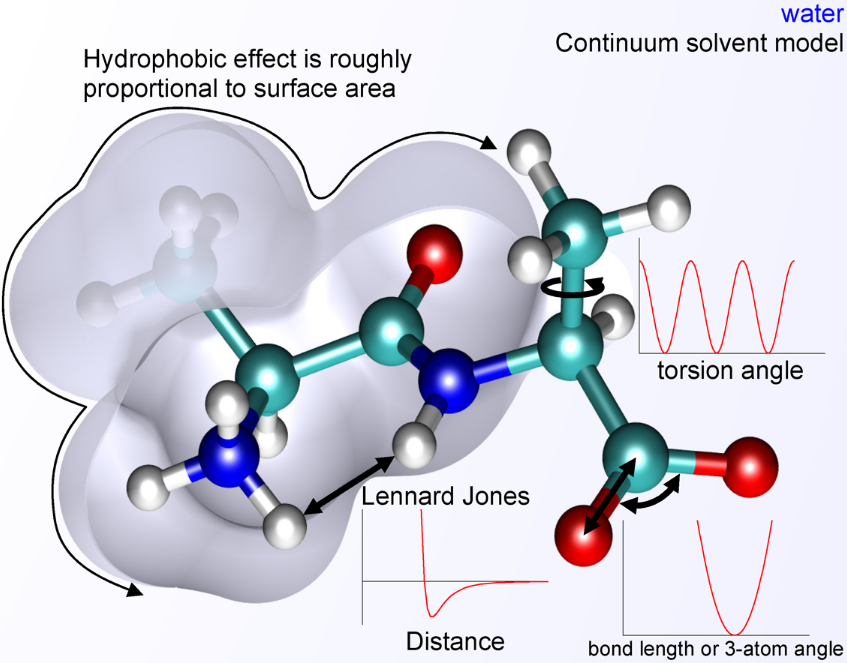</div> | <pass/> <div style="width: 260px">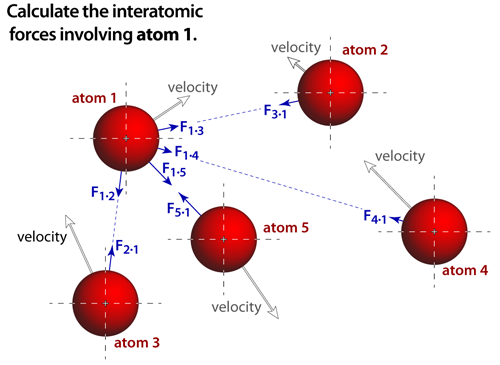</div>|
<font size="1">Figura a sinistra da https://encyclopedia.pub/entry/33716 e a destra da http://www.atomsinmotion.com/book/chapter5/md.</font>


Nel caso di una funzione di due variabili $x$ e $y$ (le considerazioni presenti si possono facilmente generalizzare a un qualsiasi numero di variabili), la derivata parziale rispetto a $x$ è definita da
$$
\frac{\partial f(x,y)}{\partial x} = \lim_{\Delta x\to 0} \frac{f(x + \Delta x, y) - f(x, y)}{\Delta x} \tag{16}
$$
e analoga definizione vale per la derivata parizale rispetto a $y$. Inoltre, possiamo applicare la derivata rispetto a $y$ alla funzione definita nella (16) per ottenere la derivata parziale seconda $\frac{\partial^2 f(x,y)}{\partial x \partial y}$, ecc. La serie di Taylor diventa
$$
\begin{align}
 & f(x+\Delta x,y+\Delta y) = f(x,y) + {\Delta x}\frac{\partial f(x,y)}{\partial x} + {\Delta y}\frac{\partial f(x,y)}{\partial y} \notag
 \\[4pt] &+ \frac{{\Delta x}^2}{2}\frac{\partial^2 f(x,y)}{{\partial x}^2} + 
 {\Delta x}{\Delta y}\frac{\partial^2 f(x,y)}{\partial x\partial y} + 
 \frac{{\Delta y}^2}{2}\frac{\partial^2 f(x,y)}{{\partial y}^2} + 
  ... \notag
 \end{align} \tag{17}
$$
dove abbiamo usato la proprietà che, per una funzione sufficientemente regolare, le derivate parziali seconde $xy$ e $yx$ sono uguali.

La libreria SciPy contiene delle funzioni per fare le derivate. Una di esse, <span style="color:blue">scipy.misc.derivative()</span>, usa la formulazione della differenza centrale per calcolare le derivate di qualsiasi ordine a partire da una funzione data come input. Tale funzione di SciPy si trova nel modulo `misc` di `scipy` (`scipy.misc`), che contiene una miscellanea di routines e si aggiunge alla lista di moduli menzionati precedentemente, così come altri che potete vedere alla pagina web https://docs.scipy.org/doc/scipy/reference/main_namespace.html#. La funzione `derivative` ha la sintassi

`scipy.misc.derivative(func, x0, dx=1.0, n=1, args=(), order=3)`

Solo i primi due argomenti non sono opzionali. L'argomento `func` è la funzione di cui si calcola la derivata di ordine $n$ (ennesima), `x0` è il punto in cui viene calcolata la derivata, `dx` è il $\Delta x$ di sopra, `n` è l'ordine della derivata, `args` sono altri argomenti che si possono fornire nella forma di una tupla (per esempio parametri da cui dipende la funzione, che vogliamo fissare) e `order` il numero di punti da usare nella derivata discreta. Tale numero deve essere dispari e il suo valore predefinito è 3. Come visto sopra, infatti, ci sono derivate a 3 punti, a 5 punti ecc. Si noti che fornendo valori di `dx` troppo piccoli si può raggiungere il limite dell'errore di arrotondamento dei numeri.  
La funzione `derivative`, così come tutto il modulo `misc`, dovrebbe essere rimossa in una futura versione di SciPy (vedi sotto). Tuttavia, essa è ancora attiva ed è pure utile per illustrare alcuni punti menzionati sopra; quindi la useremo comunque e poi considereremo altri programmi per calcolare le derivate.  
Tra le altre possibilità offerte da SciPy, vi è la funzione <span style="color:blue">scipy.optimize.approx_fprime</span>, che calcola l'approssimazione alle differenze finite delle derivate di funzioni sia scalari che vettoriali. La sintassi di tale funzione è

`scipy.optimize.approx_fprime(xk, f, epsilon, *args)`

`xk` è la coordinata (o vettore di coordinate) a cui calcolare la derivata (o il gradiente) della funzione; `f` è la funzione; `epsilon` nel caso unidimensionale è semplicemente $\Delta x$, con un valore di default 1.4901161193847656e-08; `*args` rappresenta qualsiasi altro argomento da passare alla funzione.

## 3 Programmi per calcolare derivate
Vediamo adesso come calcolare derivate usando direttamente routines di programmi. Esploreremo diversi programmi, tutti basati su Python, per mezzo di un esempio concreto.  
Consideriamo la funzione $f(x) = a\, e^{-\frac{(x-b)^2}{2w^2}} \cos^2[c(x-b)]$ che dipende dai parametri $a$, $b$, $c$ e $w$. Per esempio, si incontrano funzioni che dipendono da parametri nell'approssimazione di Born-Oppenheimer, in cui la funzione d'onda totale si scrive come prodotto della funzione d'onda nucleare e la funzione d'onda elettronica, che dipende parametricamente dalle coordinate nucleari: $\psi(\textbf{q},\textbf{Q}) = \psi_{\text{el}}(\textbf{q};\textbf{Q}) \psi_{\text{nucl}}(\textbf{Q})$.

### 3.1 Calcolo di derivate con SciPy
#### 3.1.1 scipy.misc.derivative
Prima di tutto, importiamo NumPy e Matplotlib giusto al fine di visualizzare la funzione in questione in corrispondenza di una data scelta dei parametri; quindi definiamo la funzione e ne produciamo il grafico:

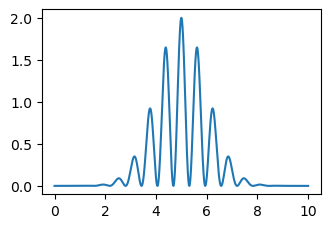

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,a,b,w,c):
    return a*np.exp(-(x-b)**2/(2*w**2))*(np.cos(c*(x-b)))**2

x = np.linspace(0,10,10**4)
y = f(x,2.0,5.0,1.0,5.0)
plt.figure(figsize=(3.6,2.4))
plt.plot(x,y)
plt.show()

Ora calcoliamo la derivata in un punto (che, per esempio, scegliamo da tastiera) usando la funzione <span style="color:blue">scipy.misc.derivative</span>.

In [23]:
from scipy.misc import derivative
derivative(f,float(input()),1e-6,args=(1.0,5.0,1.0,5.0))

 3.0


C:\Users\Agostino\AppData\Local\Temp\ipykernel_14312\3091921122.py:2: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivative(f,float(input()),1e-6,args=(1.0,5.0,1.0,5.0))


0.8083317052792749

Come vedete, la derivata viene calcolata, anche se appare un messaggio il quale avverte del fatto che tale funzione verrà rimossa in una versione successiva di SciPy e propone delle alternative. La questione è comunque controversa. Infatti, nonostante tale messaggio, è già uscita la versione v1.13.0 di SciPy e la rimozione del modulo `scipy.misc` è stata al momento posticipata alla versione v2.00.0 (vedi https://docs.scipy.org/doc/scipy/reference/misc.html).  
Sopra non abbiamo scelto un valore per `order`, mantenendo quindi il suo valore di default 3, cioè calcolando una derivata a 3 punti. Si noti che il valore diventa meno accurato se si usa un $\Delta x$ più grande. Per esempio, con $\Delta x = 10^{-6}$ abbiamo ottenuto 0.8083317052792749 mentre con $\Delta x = 0.01$ otteniamo quanto segue:

In [3]:
derivative(f,3.0,1e-2,args=(1.0,5.0,1.0,5.0))

C:\Users\Agostino\AppData\Local\Temp\ipykernel_14312\387691340.py:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivative(f,3.0,1e-2,args=(1.0,5.0,1.0,5.0))


0.8071223770460261

Tuttavia, possiamo ottenere un valore molto prossimo a quello di prima anche con un $\Delta x$ così grande se facciamo uso di una derivata alle differenze finite con un numero sufficientemente alto di punti; per esempio, con 9 punti otteniamo quanto segue:

In [4]:
derivative(f,3.0,1e-2,args=(1.0,5.0,1.0,5.0),order=9)

C:\Users\Agostino\AppData\Local\Temp\ipykernel_14312\874063037.py:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivative(f,3.0,1e-2,args=(1.0,5.0,1.0,5.0),order=9)


0.8083317050839401

#### 3.1.2 scipy.optimize.approx_fprime
Adesso usiamo la funzione <span style="color:blue">scipy.optimize.approx_fprime</span>:

In [5]:
from scipy.optimize import approx_fprime
print(approx_fprime(3.0,f,1e-6,1.0,5.0,1.0,5.0))

[0.8083317]


Tale funzione, come la precedente, consentono di calcolare anche le derivate parziali.

### 3.2 Calcolo di derivate con <span style="color:darkcyan">findiff.FinDiff</span>
In questa sezione consideriamo il primo degli approcci suggeriti da SciPy nel messaggio di sopra. A tal fine, dobbiamo installare il programma <span style="color:blue">findiff</span>, cosa che facciamo con l'istruzione di sotto.

In [23]:
!pip install --upgrade findiff

Importiamo, quindi, il programma, di cui useremo qui la funzione <span style="color:blue">findiff.FinDiff</span>.

In [2]:
import findiff as fd

Tale programma consente di definire operatori di derivata che si possono applicare ad arrays di NumPy di qualsiasi dimensione. L'operatore di derivata è dato dalla funzione <span style="color:blue">FinDiff</span>, con la seguente sintassi:

`fd.FinDiff(axis, spacing, degree)`

`axis` è l'asse lungo il quale calcolare la derivata. Nel caso di funzione di una variabile, vi è un solo asse contraddistinto dall'indice 0. Per una funzione di due variabili si considerano due assi, il secondo dei quali ha indice 1, e così via. `spacing` e la spaziatura della griglia di punti in cui è diviso lo spazio (nel caso unidimensionale, l'intervallo d'interesse sull'asse delle coordinate). `degree` è l'ordine della derivata che si vuole calcolare.  
Mentre le operazioni di derivata con SciPy viste sopra agivano sulla funzione `f` per come definita (senza bisogno di utilizzarla preventivamente, cosa che abbiamo fatto solo per mostrarne il grafico, ma non per calcolarne la derivata), la funzione `FinDiff` si applica solo ad arrays di valori assunti dalla funzione in corrispondenza di set di valori di `x`. In altre parole, prima di usare `FinDiff` bisogna settare una griglia di valori di `x` e applicare la funzione ai punti della griglia per definirla numericamente. A tal fine, usiamo le due istruzioni seguenti:

In [3]:
x,dx = np.linspace(0, 10, 10**7+1,retstep=True)
y = f(x,1.0,5.0,1.0,5.0)

In `linspace` abbiamo settato `retstep` al valore `True`. In tal modo, come abbiamo visto precedentemente, la funzione ha due output: il set di punti creati e la loro distanza (o *spacing*), che rappresenta anche il $\Delta x$ per calcolare la derivata, cioè il `dx` nella notazione presente. Abbiamo assegnato tali componenti dell'output a `x` e `dx` con la sintassi tipica delle tuple. Il numero di punti è stato scelto in modo tale che `dx` abbia lo stesso valore usato prima nelle funzioni di SciPy. Infatti, l'aggiunta di `1` compensa per il fatto che il conteggio parte da `0` (gli estremi sono entrambi inclusi secondo l'impostazione predefinita di `linspace`) e si ha `dx`$= 10/10^7 = 10^{-6}$.  
Nella funzione `f` abbiamo scelto gli stessi parametri di sopra. Abbiamo assegnato la array risultante dall'applicazione di `f` alla variabile `y`. A questo punto, possiamo ottenere la derivata della funzione in tutti i punti della griglia con la funzione `FinDiff`, tramite le due istruzioni seguenti:

In [4]:
d_dx = fd.FinDiff(0, dx, 1)
df_dx = d_dx(y)

La prima istruzione crea l'<span style="color:darkcyan">operatore di derivata</span>. Infatti, il nome da me scelto richiama $d/dx$. La seconda istruzione applica tale operatore alla funzione in tutti i punti della griglia. <span style="color:darkmagenta">Abbiamo lavorato un po' più di prima, scrivendo quattro istruzioni, ma abbiamo ottenuto in un solo colpo la valutazione della derivata in tutto l'intervallo di interesse.</span> Adesso grafichiamo la funzione e la sua derivata.

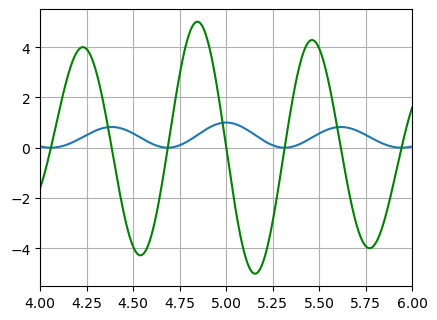

In [5]:
plt.figure(figsize=(4.8,3.6))
plt.plot(x,y,x,df_dx,'g')
plt.xlim(4,6)
plt.grid()
plt.show()

Nella figura di sopra ho mostrato solo parte dell'intervallo di $x$ considerato per evidenziare meglio come la derivata si annulli dove la funzione ha un massimo o minimo locale. Si può, ovviamente, ricavare il valore della derivata in qualsiasi punto specifico. Per esempio, consideriamo il punto scelto prima: $x = 3.0$. Tale valore deve essere definito in termini della sua posizione nella griglia, come nella prima istruzione di sotto:

In [35]:
x0 = int(3.0/dx)+1
df_dx[x0]

0.8083317005330715

Se vogliamo ottenere soltanto un valore specifico della derivata, possiamo anche procedere come segue:

In [36]:
dfdx = fd.FinDiff(0, dx, 1).stencil(y.shape)
dfdx.apply(y, x0)

0.8083317005366553

`stencil` è, nel nostro caso, l'arrangiamento geometrico dei punti necessari al calcolo della derivata, che dipende dalla forma della griglia e consequentemente dell'array di y. Chiaramente, è molto semplice definire qualsiasi operatore con derivate a partire da `FinDiff`, usando opportune combinazioni lineari di `FinDiff` con diversi nomi di variabili.

### 3.3 Calcolo di derivate con <span style="color:darkcyan">SymPy</span>
Usiamo, infine, <span style="color:blue">Sympy</span> una libreria scientifica in linguaggio Python per la matematica simbolica (https://www.sympy.org/en/index.html) fornita già da Anaconda, per cui basta semplicemente importarla per poterla usare:

In [2]:
import sympy as smp
from sympy import diff

SymPy ci consente di ottenere semplicemente l'espressione analitica della funzione derivata. La classe più importante definita in SymPy è `Symbol`. La funzione <span style="color:blue">sympy.symbols</span> trasforma stringhe in realizzazioni della classe `Symbol`, cioè, in pratica, in simboli da poter usare nel calcolo simbolico. Così, per esempio,

In [3]:
from sympy import symbols
x, y = symbols('x y')

ci consente di usare `x`e `y` come simboli di grandezze matematiche in espressioni analitiche. A tal fine, si possono anche importare simboli dal modulo `sympy.abc` (vedi al link https://docs.sympy.org/latest/modules/abc.html#module-sympy.abc), che contiene tutte le lettere degli alfabeti latino e greco con la valenza di simboli. Nel caso della funzione di nostro interesse, eseguiamo quindi la seguente riga di comando:

In [4]:
from sympy.abc import x,a,b,w,c

Una volta definita la funzione come segue:

In [6]:
f = a*smp.exp(-(x-b)**2/(2*w**2))*(smp.cos(c*(x-b)))**2
f

a*exp(-(-b + x)**2/(2*w**2))*cos(c*(-b + x))**2

si può usare la funzione <span style="color:blue">diff</span> (https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html) per ottenere l'espressione analitica della sua derivata:

In [7]:
dfdx = diff(f,x)
dfdx

-2*a*c*exp(-(-b + x)**2/(2*w**2))*sin(c*(-b + x))*cos(c*(-b + x)) - a*(-2*b + 2*x)*exp(-(-b + x)**2/(2*w**2))*cos(c*(-b + x))**2/(2*w**2)

Inoltre, con `print`, possiamo trasformare l'espressione simbolica di sopra in un'espressione pronta per essere inserita in un programma:

In [8]:
print(dfdx)

-2*a*c*exp(-(-b + x)**2/(2*w**2))*sin(c*(-b + x))*cos(c*(-b + x)) - a*(-2*b + 2*x)*exp(-(-b + x)**2/(2*w**2))*cos(c*(-b + x))**2/(2*w**2)


Adesso, se vogliamo calcolare il valore della derivata a un dato punto, per esempio $x = 3$, possiamo usare la funzione <span style="color:blue">lambdifydiff</span> (vedi alla pagina web https://docs.sympy.org/latest/modules/utilities/lambdify.html), con le seguenti istruzioni:

In [9]:
df_dx = smp.lambdify((x,a,b,w,c),dfdx)
df_dx(3.0,1.0,5.0,1.0,5.0)

0.8083317050896284

A partire dall'espressione analitica simbolica della funzione, la prima istruzione crea una cosiddetta <span style="color:blue">funzione lambda</span>, che può essere rapidamente valutata per qualsiasi valore di $x$ e dei parametri. Di nuovo, potremmo usare `float(input())` al posto di ciascuno degli argomenti $a$, $b$, ecc. per fornire i parametri da tastiera. La seconda istruzione calcola la funzione lambda per i valori di $x$ e dei parametri desiderati.  
Possiamo adesso valutare la derivata velocemente in un set di punti e graficarla.

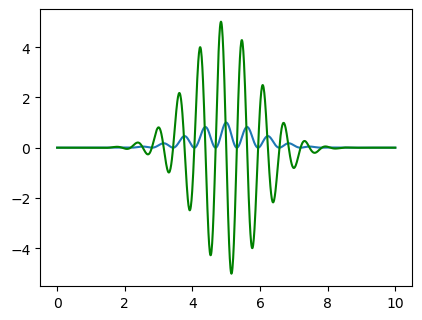

In [10]:
ff = smp.lambdify((x,a,b,w,c),f)

x = np.linspace(0,10.0,1000)
y = ff(x,1.0,5.0,1.0,5.0)
y1 = df_dx(x,1.0,5.0,1.0,5.0)
plt.figure(figsize=(4.8,3.6))
plt.plot(x,y,x,y1,'g')
plt.show()

A questo punto, notiamo che abbiamo usato $a$, $b$, ecc. come parametri, ma potevamo considerarli come altre variabili ed effettuare la derivata (che ora acquisisce il significato di derivata parziale) rispetto ad una qualsiasi di tali variabili. Per esempio,

In [11]:
dfda = diff(f,a)
dfda

exp(-(-b + x)**2/(2*w**2))*cos(c*(-b + x))**2

Ecco altri esempi:

In [26]:
x, y = symbols('x y')
F = x**2*y**3 + x**2 + y**4
dF1 = diff(F,x)
dF2 = diff(F,x,x)
dF3 = diff(F,x,2)
dF4 = diff(F,x,2,y,3)
dF5 = diff(F,y,3,x,2)
dF1, dF2, dF3, dF4, dF5

(2*x*y**3 + 2*x, 2*(y**3 + 1), 2*(y**3 + 1), 12, 12)

Le derivate parziali si possono opportunamente calcolare anche con le altre funzioni viste prima.  
Si noti, infine, che SymPy contiene anche i metodi per fare le derivate alle differenze finite.